In [1]:
import pandas as pd
print("start")
df = pd.read_csv("./Data/processed_data.csv")
df = df[df.n_rating>1000]
#df.head()
print("finish to load data")

start
finish to load data


In [2]:
df.head()

,Unnamed: 0,userId,movieId,rating,title,genres,n_rating,mean_rating
0,0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
1,1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
2,2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
3,3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
4,4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977


In [3]:
import requests
def telegram_bot_sendtext(bot_message):
    
    bot_token = '661544421:AAHuZSMukZmFlhU-npE23CowogP375a0au4'
    bot_chatID = '-225157366'
    send_text = 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + '&parse_mode=Markdown&text=' + bot_message

    response = requests.get(send_text)

    return response.json()


In [4]:
import numpy as np
import keras
import tensorflow as tf


/home/fio/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
#del user_input, movie_input, Embedd_movies, Embedd_user
#model = keras.models.load_model("300_drop03.h5")

In [6]:
user_input = keras.Input(shape = (1,), name = "user_id")
movie_input = keras.Input(shape = (1,), name = "movie_id")
Embedd_user = keras.layers.Embedding(df.userId.max()+10,300, name="Embedd_user")(user_input)
Embedd_movies = keras.layers.Embedding(df.movieId.max()+10,300, name="Embedd_movies")(movie_input)
Dot = keras.layers.Dot(2)([Embedd_user,Embedd_movies])
Flatten = keras.layers.Flatten()(Dot)

In [15]:

del user_input, movie_input, Embedd_movies, Embedd_user, Dot


In [16]:

movie_r12n = keras.regularizers.l2(1e-6)
user_r12n = keras.regularizers.l2(1e-7)
movie_r12n = None
user_r12n = None

user_input = keras.Input(shape = (1,), name = "user_id")
movie_input = keras.Input(shape = (1,), name = "movie_id")
mean_rate = keras.Input(shape = (1,), name = "mean_rate")
Embedd_user = keras.layers.Embedding(df.userId.max()+10,300, name="Embedd_user",
                                     input_length=1, embeddings_regularizer= movie_r12n)(user_input)
Embedd_movies = keras.layers.Embedding(df.movieId.max()+10,300, name="Embedd_movies", 
                                       input_length=1, embeddings_regularizer= user_r12n)(movie_input)
user_dropout = keras.layers.Dropout(0.3, name="Dropout_user")(Embedd_user)
movie_dropout = keras.layers.Dropout(0.3, name="Dropout_movie")(Embedd_movies)
Dot = keras.layers.Dot(2)([user_dropout, movie_dropout])
Flatten = keras.layers.Flatten()(Dot)
model = keras.Model(
    inputs = [user_input, movie_input],
    outputs = Flatten
)

model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
Embedd_user (Embedding)         (None, 1, 300)       41550900    user_id[0][0]                    
__________________________________________________________________________________________________
Embedd_movies (Embedding)       (None, 1, 300)       33858600    movie_id[0][0]                   
____________________________________________________________________________________________

In [6]:

movie_r12n = keras.regularizers.l2(1e-6)
user_r12n = keras.regularizers.l2(1e-7)
movie_r12n = None
user_r12n = None

user_input = keras.Input(shape = (1,), name = "user_id")
movie_input = keras.Input(shape = (1,), name = "movie_id")
mean_rate = keras.Input(shape = (1,), name = "mean_rate")
Embedd_user = keras.layers.Embedding(df.userId.max()+10,300, name="Embedd_user",
                                     input_length=1, embeddings_regularizer= movie_r12n)(user_input)
Embedd_movies = keras.layers.Embedding(df.movieId.max()+10,300, name="Embedd_movies", 
                                       input_length=1, embeddings_regularizer= user_r12n)(movie_input)
user_dropout = keras.layers.Dropout(0.3, name="Dropout_user")(Embedd_user)
movie_dropout = keras.layers.Dropout(0.3, name="Dropout_movie")(Embedd_movies)
Dot = keras.layers.Dot(2)([user_dropout, movie_dropout])
Flatten = keras.layers.Flatten()(Dot)
Out = keras.layers.Add()([Flatten, mean_rate])
model = keras.Model(
    inputs = [user_input, movie_input, mean_rate],
    outputs = Out
)

model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
Embedd_user (Embedding)         (None, 1, 300)       41550900    user_id[0][0]                    
__________________________________________________________________________________________________
Embedd_movies (Embedding)       (None, 1, 300)       33858600    movie_id[0][0]                   
__________________________________________________________________________________________________
Dropout_us

In [66]:

movie_r12n = keras.regularizers.l2(1e-6)
user_r12n = keras.regularizers.l2(1e-7)
movie_r12n = None
user_r12n = None

user_input = keras.Input(shape = (1,), name = "user_id")
movie_input = keras.Input(shape = (1,), name = "movie_id")
mean_rate = keras.Input(shape = (1,), name = "mean_rate")
Embedd_user = keras.layers.Embedding(df.userId.max()+10,30, name="Embedd_user",
                                     input_length=1, embeddings_regularizer= movie_r12n)(user_input)
Embedd_movies = keras.layers.Embedding(df.movieId.max()+10,30, name="Embedd_movies", 
                                       input_length=1, embeddings_regularizer= user_r12n)(movie_input)
Embedd_user = keras.layers.Dropout(0.3, name="Dropout_user")(Embedd_user)
Embedd_movies = keras.layers.Dropout(0.3, name="Dropout_movie")(Embedd_movies)
concatenate = keras.layers.concatenate([Embedd_user, Embedd_movies], name = 'concatenate')
out = keras.layers.Flatten()(concatenate)
for i in [200,100,1]:
    out = keras.layers.Dense(i, activation='relu')(out)
#Dot = keras.layers.Dot(2)([user_dropout, movie_dropout])
#Flatten = keras.layers.Flatten()(Dot)
model = keras.Model(
    inputs = [user_input, movie_input],
    outputs = out
)

model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
Embedd_user (Embedding)         (None, 1, 30)        4155090     user_id[0][0]                    
__________________________________________________________________________________________________
Embedd_movies (Embedding)       (None, 1, 30)        3385860     movie_id[0][0]                   
__________________________________________________________________________________________________
Dropout_us

In [21]:

model.compile(
    # Technical note: when using embedding layers, I highly recommend using one of the optimizers
    # found  in tf.train: https://www.tensorflow.org/api_guides/python/train#Optimizers
    # Passing in a string like 'adam' or 'SGD' will load one of keras's optimizers (found under 
    # tf.keras.optimizers). They seem to be much slower on problems like this, because they
    # don't efficiently handle sparse gradient updates.
    tf.train.AdamOptimizer(0.005),
    loss='MSE',
    metrics=['MAE'],
)


In [10]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
Embedd_user (Embedding)         (None, 1, 300)       41550900    user_id[0][0]                    
__________________________________________________________________________________________________
Embedd_movies (Embedding)       (None, 1, 300)       33858600    movie_id[0][0]                   
____________________________________________________________________________________________

In [11]:
df.head()

,Unnamed: 0,userId,movieId,rating,title,genres,n_rating,mean_rating
0,0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
1,1,5,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
2,2,13,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
3,3,29,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977
4,4,34,2,3.0,Jumanji (1995),Adventure|Children|Fantasy,22243,3.211977


In [20]:
from sklearn.model_selection import train_test_split
u_train, u_test, m_train, m_test, r_train, r_test , mr_train, mr_test= train_test_split(df.userId, df.movieId, df.rating,
                                                                                        df.mean_rating,
                                                                     test_size= 0.7,
                                                                    random_state = 87)
r_train.shape

(5329654,)

In [45]:

'''import tensorflow as tf
from tensorflow.python import debug as tf_debug
import keras
run_metadata = tf.RunMetadata()
keras.backend.set_session(
    tf_debug.TensorBoardDebugWrapperSession(tf.Session(), "fio:6007"))'''


'import tensorflow as tf\nfrom tensorflow.python import debug as tf_debug\nimport keras\nrun_metadata = tf.RunMetadata()\nkeras.backend.set_session(\n    tf_debug.TensorBoardDebugWrapperSession(tf.Session(), "fio:6007"))'

In [13]:
from keras.callbacks import TensorBoard
import time
from time import time as currentTime
import tensorflow as tf
tensorboard = TensorBoard(log_dir="logs/{}".format(currentTime()))

In [22]:

history = model.fit([u_train, m_train], r_train, batch_size= 100000, epochs=20,
    verbose=1, callbacks = [tensorboard], validation_data=([u_test, m_test], r_test))
 #


Train on 5329654 samples, validate on 12435862 samples
Epoch 1/20
5329654/5329654 [==============================] - 7s 1us/step - loss: 10.7867 - mean_absolute_error: 3.0192 - val_loss: 2.2303 - val_mean_absolute_error: 1.1948
Epoch 2/20
5329654/5329654 [==============================] - 6s 1us/step - loss: 1.1622 - mean_absolute_error: 0.8343 - val_loss: 0.7927 - val_mean_absolute_error: 0.6890
Epoch 3/20
5329654/5329654 [==============================] - 6s 1us/step - loss: 0.7991 - mean_absolute_error: 0.6957 - val_loss: 0.7487 - val_mean_absolute_error: 0.6681
Epoch 4/20
5329654/5329654 [==============================] - 7s 1us/step - loss: 0.7287 - mean_absolute_error: 0.6642 - val_loss: 0.7270 - val_mean_absolute_error: 0.6584
Epoch 5/20
5329654/5329654 [==============================] - 7s 1us/step - loss: 0.6597 - mean_absolute_error: 0.6325 - val_loss: 0.7184 - val_mean_absolute_error: 0.6545
Epoch 6/20
5329654/5329654 [==============================] - 6s 1us/step - loss: 0.

In [11]:

history = model.fit([u_train, m_train, mr_train], r_train, batch_size= 100000, epochs=10,
    verbose=1, callbacks = None, validation_data=([u_test, m_test, mr_test], r_test))
 #


Train on 17676688 samples, validate on 88828 samples
Epoch 1/10
17676688/17676688 [==============================] - 15s 1us/step - loss: 0.7607 - mean_absolute_error: 0.6704 - val_loss: 0.6434 - val_mean_absolute_error: 0.6101
Epoch 2/10
17676688/17676688 [==============================] - 13s 1us/step - loss: 0.5758 - mean_absolute_error: 0.5791 - val_loss: 0.6109 - val_mean_absolute_error: 0.5948
Epoch 3/10
17676688/17676688 [==============================] - 13s 1us/step - loss: 0.4884 - mean_absolute_error: 0.5350 - val_loss: 0.6113 - val_mean_absolute_error: 0.5948
Epoch 4/10
17676688/17676688 [==============================] - 13s 1us/step - loss: 0.4445 - mean_absolute_error: 0.5117 - val_loss: 0.6129 - val_mean_absolute_error: 0.5957
Epoch 5/10
17676688/17676688 [==============================] - 13s 1us/step - loss: 0.4209 - mean_absolute_error: 0.4984 - val_loss: 0.6150 - val_mean_absolute_error: 0.5969
Epoch 6/10
17676688/17676688 [==============================] - 13s 1us/

In [14]:
r_test.shape

(1776552,)

In [48]:
result = model.predict([u_train, m_train]).reshape(-1) - r_train
train_mean=abs(result).mean()
train_std = result.std()
del result
result = model.predict([u_test, m_test]).reshape(-1) - r_test
test_mean = abs(result).mean()
test_std = result.std()
del result

In [1]:
"""result = model.predict([u_train, m_train, mr_train]).reshape(-1) - r_train
train_mean=abs(result).mean()
train_std = result.std()
del result
result = model.predict([u_test, m_test, mr_test]).reshape(-1) - r_test
test_mean = abs(result).mean()
test_std = result.std()
del result"""

'result = model.predict([u_train, m_train, mr_train]).reshape(-1) - r_train\ntrain_mean=abs(result).mean()\ntrain_std = result.std()\ndel result\nresult = model.predict([u_test, m_test, mr_test]).reshape(-1) - r_test\ntest_mean = abs(result).mean()\ntest_std = result.std()\ndel result'


計算結果
<br/>不要只看上面的資料，要看實際的要直接算一次

### 沒有Dropout
訓練0.28，測試0.727
### Dropout = 0.3
訓練0.62，測試0.62

### Dropout = 0.3 + 正則化
keras.regularizers.l2(1e-6)
訓練0.56，測試0.65

### Dropout = 0.3 輸出時加上該電影的平均評分，並只抓1000評論以上的電影
訓練資料:
abs(loss).mean() = 0.36278606066990915 
標準差 = 0.48438608045942294

測試資料:
abs(loss).mean() = 0.5950168054784901 
標準差 = 0.7825261732436337

### 加上兩層Dense[200,100,1]relu然後輸出
abs(loss).mean() = 0.5249670271601128 
標準差 = 0.6882695584227468

測試資料:
abs(loss).mean() = 0.6047279668688645 
標準差 = 0.7952802090451994
(跟平均分的算法差不多，不過這個還沒有dropout)




In [49]:
result = "結果出來了，訓練結果訓練資料:\nabs(loss).mean() = "+ str(train_mean) + " \n標準差 = " + str(train_std)+"\n\n測試資料:\nabs(loss).mean() = "+ str(test_mean) + " \n標準差 = " + str(test_std)

telegram_bot_sendtext(result)

print(result)

結果出來了，訓練結果訓練資料:
abs(loss).mean() = 0.3195066151582834 
標準差 = 0.41547637743599997

測試資料:
abs(loss).mean() = 0.6585722368792404 
標準差 = 0.848340796403475


In [50]:
#model.save("")

In [51]:
predict = model.predict([u_test, m_test]).reshape(-1)

In [52]:
loss = np.array(predict) - np.array(r_test)

In [53]:
loss.shape

(12435862,)

In [54]:
abs(loss).mean()

0.6585722368792404

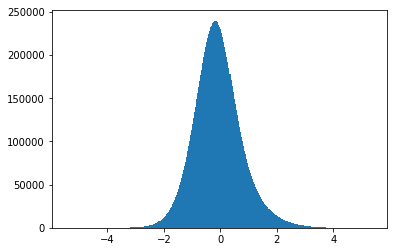

In [55]:
plt.hist(loss, 300, )  
plt.show()

/home/fio/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  import sys


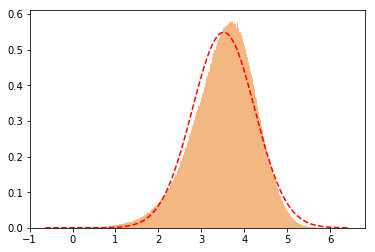

In [31]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab  
plt.hist(predict, bins= 300, normed=1, alpha=0.1)
num_bins = 300
n, bins, patches = plt.hist(predict, num_bins, normed=1, alpha=0.5)  
# add a 'best fit' line  
y = mlab.normpdf(bins, predict.mean(), predict.std())
plt.plot(bins, y, 'r--')  

In [ ]:



r_train.shape






result = "結果出來了，訓練結果訓練資料abs(loss).mean() = "+ str(train_mean) + " 標準差 = " + str(train_std)+"\n測試資料abs(loss).mean() = "+ str(test_mean) + " 標準差 = " + str(test_std)

telegram_bot_sendtext(result)

print(result)

predict = model.predict([u_test, m_test]).reshape(-1)

predict



predict[np.where(predict<0.5)].shape

predict[np.where(predict>5)].mean()

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab  
plt.hist(predict, bins= 30, normed=1, alpha=0.1)
num_bins = 50 
n, bins, patches = plt.hist(predict, num_bins, normed=1, alpha=0.5)  
# add a 'best fit' line  
y = mlab.normpdf(bins, predict.mean(), predict.std())
plt.plot(bins, y, 'r--')  
#plt.xlabel('Smarts')  
#plt.ylabel('Probability')  
#plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')  

# Tweak spacing to prevent clipping of ylabel  
plt.subplots_adjust(left=0.15)  
plt.show() 
#y = mlab.normpdf(bins, predict.mean(), predict.std())

abs(result).mean()

abs(result).mean()


telegram_bot_sendtext("@IshengChen The model train is finish,\n the abs(loss).mean() is"+str(abs(result).mean()))